Match the APOGEE-red-clump catalog to Gaia DR2, integrate the orbits using galpy for 20 Gyr, and make a density plot in Galactocentric X and Y coordinates of all of the positions of the stars over the next 20 Gyr.

In [1]:
#import os
# set environment variable for gaia_tools.load to work
#os.environ['GAIA_TOOLS_DATA'] = "C:/Users/user/Git Hub Projects/GAIA_TOOLS_DATA"

In [1]:
import astropy.units as u
import gaia_tools.load as gload
import gaia_tools.xmatch as gmatch
from galpy.potential import MWPotential2014
from galpy.orbit import Orbit
from astropy.coordinates import SkyCoord
import numpy as np

load the data from APOGEE red clump and cross match with gaia2

In [3]:
aprc= gload.apogeerc()
gaia2_matches, matches_indx = gmatch.cds(aprc, xcat='vizier:I/345/gaia2')

C:\Users\user\AppData\Roaming\Python\Python36\site-packages\gaia_tools-0.2-py3.6.egg\gaia_tools\load\__init__.py:94: UserWarning: Falling back on simple APOGEE interface; for more functionality, install the jobovy/apogee package
  warnings.warn("Falling back on simple APOGEE interface; for more functionality, install the jobovy/apogee package")



Get the list of the 6 coordinates

In [4]:
# take out all the stars whose radial velocity is -9999.99
gaia2_matches = gaia2_matches[gaia2_matches['radial_velocity'] != -9999.99]

In [5]:
ra_list = gaia2_matches['ra']
dec_list = gaia2_matches['dec']
parallax_list = gaia2_matches['parallax']
vr_list = gaia2_matches['radial_velocity']
pm_ra_list = gaia2_matches['pmra']
pm_dec_list = gaia2_matches['pmdec']

In [6]:
# create time array
ts = np.linspace(0,20,1000)
# initialize orbit list
o = []
# initialize star location plot
star_coord = []

create an orbit object for each star

In [ ]:
%pylab inline
for i in range(np.size(gaia2_matches)):
    ra, dec, parallax, vr, v_ra, v_dec = ra_list[i], dec_list[i], parallax_list[i], vr_list[i], pm_ra_list[i], pm_dec_list[i]
    # use parallex to find radial distance
    d = 1/parallax # since parallax is given in milliarcsecond, its inverse is kpc
    # create orbit object
    o.append(Orbit(vxvv = [ra,dec,d,v_ra, v_dec,vr], radec = True))
    o[i].integrate(ts,MWPotential2014)
    # store the x,y coordinate of each star after 20 Gyr
    coordinate = (o[i].x(20),o[i].y(20))
    star_coord.append(coordinate)

Populating the interactive namespace from numpy and matplotlib


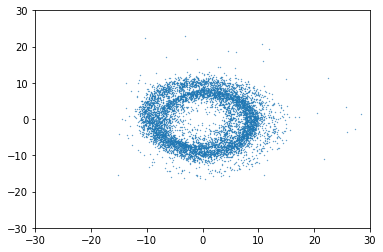

In [25]:
import pylab as plt
star_coord = np.array(star_coord)
x = star_coord[:, 0]
y = star_coord[:,1]
plt.scatter(x,y, s = 0.1)
plt.xlim(-30,30)
plt.ylim(-30,30)
np.savez("x_y.npz", x = x, y = y)
plt.savefig("20 Gyr density plot.pdf")

In [26]:
data = np.load("x_y.npz")
nx=data['x']
ny=data['y']

print(x==nx)

[ True  True  True ...  True  True  True]
